In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')


# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1i4W-2dRMfEp4De8iL6cCxDV5NH-S1QAQ/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]
print(id)

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

1i4W-2dRMfEp4De8iL6cCxDV5NH-S1QAQ


,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [ ]:
df.nunique()

Gender        2
Age          58
NS1           2
IgG           2
IgM           2
Area         36
AreaType      2
HouseType     3
District      1
Outcome       2
dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.drop(['District'], axis=1)

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'Area', 'AreaType', 'HouseType']
Numerical Variables:
['Age', 'NS1', 'IgG', 'IgM', 'Outcome']


AreaType
Developed      498
Undeveloped    498
Name: count, dtype: int64


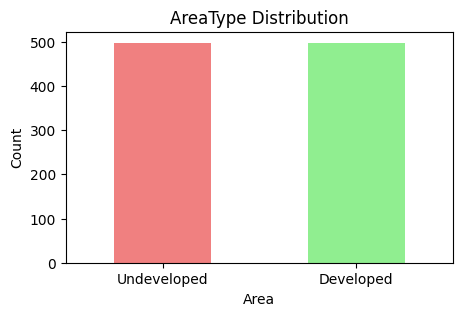

In [ ]:
# Visualize the distribution of the 'Area' variable

print(df.value_counts('AreaType'))

plt.figure(figsize=(5, 3))
df['AreaType'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('AreaType Distribution')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

Gender
Female    521
Male      475
Name: count, dtype: int64


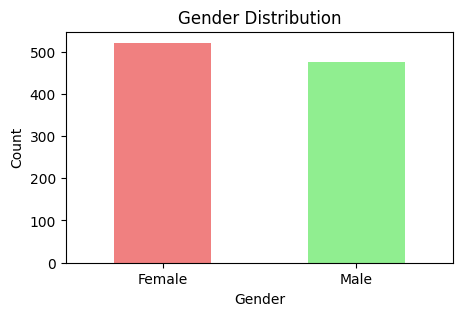

In [ ]:
# Visualize the distribution of the 'Area' variable

print(df.value_counts('Gender'))

plt.figure(figsize=(5, 3))
df['Gender'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

HouseType
Building    351
Other       328
Tinshed     317
Name: count, dtype: int64


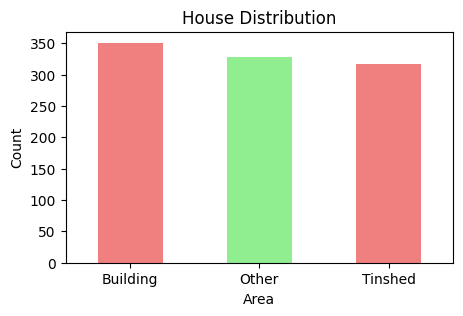

In [ ]:
# Visualize the distribution of the 'Area' variable

print(df.value_counts('HouseType'))

plt.figure(figsize=(5, 3))
df['HouseType'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('House Distribution')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Area', 'AreaType', 'HouseType'])
df

,Age,NS1,IgG,IgM,Outcome,Gender_Female,Gender_Male,Area_Adabor,Area_Badda,Area_Banasree,...,Area_Shahbagh,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,45,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,17,0,0,1,0,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,29,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,63,1,1,0,1,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,22,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16,1,1,0,1,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
996,41,1,1,0,1,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
997,45,0,0,1,0,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
998,19,1,1,1,1,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
df.isnull().sum()

Age                         0
NS1                         0
IgG                         0
IgM                         0
Outcome                     0
Gender_Female               0
Gender_Male                 0
Area_Adabor                 0
Area_Badda                  0
Area_Banasree               0
Area_Bangshal               0
Area_Biman Bandar           0
Area_Bosila                 0
Area_Cantonment             0
Area_Chawkbazar             0
Area_Demra                  0
Area_Dhanmondi              0
Area_Gendaria               0
Area_Gulshan                0
Area_Hazaribagh             0
Area_Jatrabari              0
Area_Kadamtali              0
Area_Kafrul                 0
Area_Kalabagan              0
Area_Kamrangirchar          0
Area_Keraniganj             0
Area_Khilgaon               0
Area_Khilkhet               0
Area_Lalbagh                0
Area_Mirpur                 0
Area_Mohammadpur            0
Area_Motijheel              0
Area_New Market             0
Area_Palla

In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (796, 47)
X_test shape: (200, 47)
y_train shape: (796,)
y_test shape: (200,)


In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 20, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 1.0


In [ ]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 1.0


In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

[[ 79   0]
 [  0 121]]


In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[ 79   0]
 [  0 121]]


In [ ]:
#Implementing of Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)  # Lower MSE indicates better fit

Mean Squared Error: 2.2037351526027263e-31


In [ ]:
#Implementing of Gradient Boosting Regression (GBR)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing set (optional for evaluation)
y_pred = model.predict(X_test)

# Evaluate model performance (optional but highly recommended)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)  # Lower MSE indicates better fit

Mean Squared Error: 1.7398944602229274e-10


In [ ]:
#Implementing of SVR model

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)  # Lower MSE indicates better fit

Mean Squared Error: 0.026558690774844348
